In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Sukamal/DL 4-6/advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
y = df["sales"]
X = df.drop("sales",axis=1)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
# Scaling data

In [8]:
ss = StandardScaler()

In [9]:
X_train_ss = ss.fit_transform(X_train)

In [10]:
X_test_ss = ss.transform(X_test)

In [23]:
# Neural Network

model = Sequential()
model.add(Dense(8,activation="tanh", input_dim=3))
model.add(Dense(8,activation="tanh"))
model.add(Dense(1))


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer="sgd", loss="mse")

In [26]:
trained_model = model.fit(X_train_ss, y_train, epochs=50, batch_size=32)

Epoch 1/50
5/5 [==============================] - 0s 3ms/step - loss: 181.9558
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 83.1046
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 33.6362
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 19.5636
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 13.5665
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 10.8537
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 9.1266
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 7.8424
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 6.5193
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 5.5815
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 4.6380
Epoch 12/50
5/5 [==============================] - 0s 3ms/step - loss: 4.2319
Epoch 13/50
5/5 [==============================] - 0s 3ms/step - l

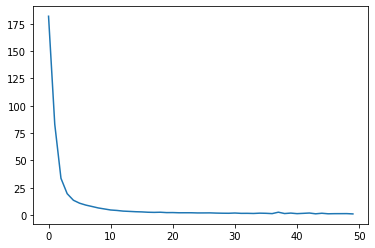

In [27]:
plt.plot(trained_model.history["loss"])

In [ ]:
# Testing

In [28]:
y_pred = model.predict(X_test_ss)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y_test,y_pred)

0.7631851108036295